In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3

In [ ]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [ ]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                    title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
shivan118/healthcare-analytics                         AV : Healthcare Analytics                           2MB  2020-09-13 17:40:05           2064  
datatattle/covid-19-nlp-text-classification            Coronavirus tweets NLP - Text Classification        4MB  2020-09-08 11:40:11           1387  
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31           2458  
Cornell-University/arxiv                               arXiv Dataset                                     888MB  2020-09-22 15:33:49           3114  
nipunarora8/age-gender-and-ethnicity-face-data-csv     AGE, GENDER AND ETHNICITY (FACE DATA) CSV          

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 97% 337M/346M [00:03<00:00, 144MB/s]
100% 346M/346M [00:03<00:00, 98.5MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/intel-image-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
test_path = '/content/seg_test/seg_test'
train_path = '/content/seg_train/seg_train'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.2,
                    fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale = 1./255,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True)

In [ ]:
training_data = train_datagen.flow_from_directory(train_path,
                                             target_size = (100,100),
                                             classes = ["buildings","forest","glacier","mountain","sea","street"],
                                             batch_size = 32,
                                             class_mode = 'categorical',
                                             subset='training')

test_data = train_datagen.flow_from_directory(train_path,
                                         target_size = (100,100),
                                         classes = ["buildings","forest","glacier","mountain","sea","street"],
                                         batch_size = 32,
                                         class_mode = 'categorical', 
                                         subset='validation')

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [ ]:
var_acc = 80/100
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')is not None and logs.get('accuracy') > var_acc):
      print("\nAkurasi diatas ", var_acc*100 , "% , train data diberhentikan !")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32,(3,3),input_shape = (100,100,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(6,activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         7

In [ ]:
history = model.fit(training_data,epochs = 25,batch_size = 32,validation_data = test_data, callbacks=[callbacks])

Epoch 1/25
351/351 [==============================] - 43s 122ms/step - loss: 1.2754 - accuracy: 0.4748 - val_loss: 1.0062 - val_accuracy: 0.5966
Epoch 2/25
351/351 [==============================] - 42s 119ms/step - loss: 0.9803 - accuracy: 0.6101 - val_loss: 0.8675 - val_accuracy: 0.6569
Epoch 3/25
351/351 [==============================] - 42s 120ms/step - loss: 0.8846 - accuracy: 0.6614 - val_loss: 0.7897 - val_accuracy: 0.7104
Epoch 4/25
351/351 [==============================] - 42s 121ms/step - loss: 0.7888 - accuracy: 0.7118 - val_loss: 0.7317 - val_accuracy: 0.7418
Epoch 5/25
351/351 [==============================] - 41s 118ms/step - loss: 0.7138 - accuracy: 0.7395 - val_loss: 0.7646 - val_accuracy: 0.7272
Epoch 6/25
351/351 [==============================] - 42s 119ms/step - loss: 0.6757 - accuracy: 0.7516 - val_loss: 0.6355 - val_accuracy: 0.7614
Epoch 7/25
351/351 [==============================] - 42s 119ms/step - loss: 0.6230 - accuracy: 0.7785 - val_loss: 0.6480 - val_ac

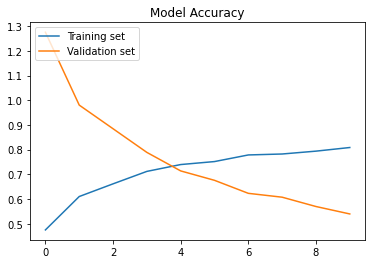

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title('Model Accuracy')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
!pip install tensorflowjs

In [ ]:
model.save("Intel Image Classification.h5")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmptrra5ix0/assets


In [ ]:
with tf.io.gfile.GFile('Intel_image_classification.tflite', 'wb') as f:
  f.write(tflite_model)